<font color='dark'>  </font>
# A quick example of creating a ML model using the Tensorflow API.

In [52]:
import tensorflow as tf
print (tf.__version__)
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

2.11.0


### First, let's try simple linear regression method. 

In [53]:
data = pd.read_csv('./slr/Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']

# y = w*x + b

In [54]:
w = 0; b = 0

# make it as a function!!
def plot_pred(w, b):
    """
    This funct is used to plot pred
    """
    y_pred = x*w + b
    plt.plot(x, y_pred, 'teal', label="prediction")
    plt.scatter(x,y, marker='x',color='r', label="real data")
    plt.title("experience - salary")
    plt.xlabel("salary")
    plt.ylabel("experience")
    plt.xlim([0,12]); plt.ylim([0, 140])
    plt.legend()

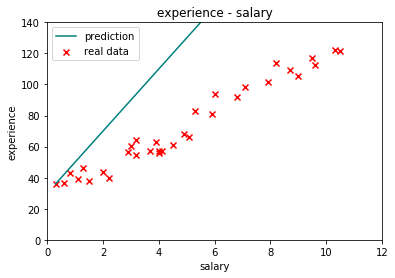

In [55]:
plot_pred(20,30)

In [56]:
from ipywidgets import interact

In [57]:
interact(plot_pred, w=(-100, 100, 1), b = (-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

### Now, calculate the cost function. 

In [58]:
w = 10; b = 0
y_pred = x*w + b
cost = (y - y_pred)**2
cost.sum()/len(x)

602.547878787879

In [59]:
# make it as a function!!
def cal_cost(x,y,w,b):
    """
    This funct is used to calculate cost function
    """
    y_pred = x*w + b
    cost = (y - y_pred)**2
    cost = cost.sum()/len(x)
    
    return cost

cal_cost(x,y,10,0)

602.547878787879

In [60]:
costs = []
for w in range(-100, 101):
    cost = cal_cost(x, y, w, 0)
    costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

Text(0.5, 1.0, 'x - cost function')

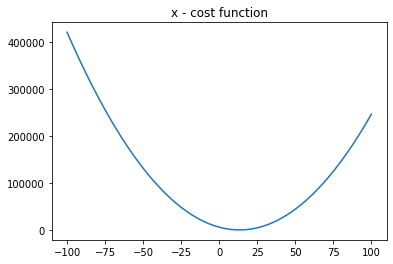

In [61]:
plt.plot(range(-100, 101), costs)
plt.title("x - cost function")

In [62]:
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201,201))

###
i = 0
for w in ws:
    j = 0
    for b in bs:
        cost = cal_cost(x,y,w,b)
        costs[i,j] = cost
        j = j + 1
    i = i + 1
    
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

when w = [9], b = [29] will have min cost: [32.69484848]


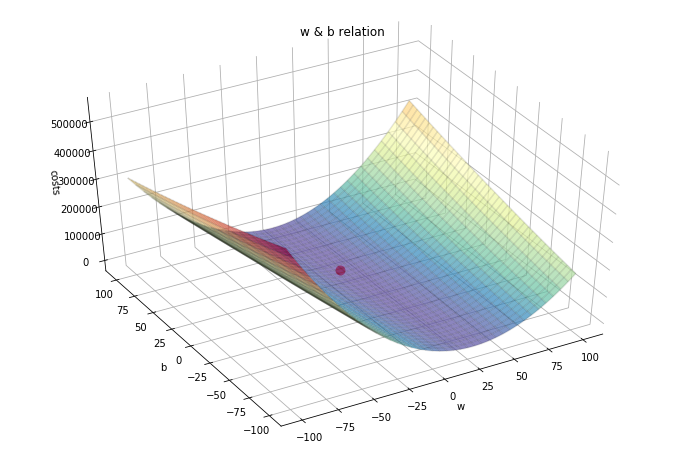

In [77]:
plt.figure(figsize=(12,8))

ax = plt.axes(projection = '3d')
ax.view_init(45, -120) # up-down / left-right

ax.xaxis.set_pane_color((0,0,0)) # write color 
ax.yaxis.set_pane_color((0,0,0)) # write color 
ax.zaxis.set_pane_color((0,0,0)) # write color 

b_grid, w_grid = np.meshgrid(bs, ws)

ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha = 0.7)
ax.plot_wireframe(w_grid, b_grid, costs, color='k', alpha = 0.1)

ax.set_title("w & b relation")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")

w_index, b_index = np.where(costs == np.min(costs))

ax.scatter(ws[w_index], bs[b_index], costs[w_index,b_index], color="r", s=80)

plt.show()

In [78]:
print (f"when w = {ws[w_index]}, b = {bs[b_index]} will have min cost: {costs[w_index,b_index]}")

when w = [9], b = [29] will have min cost: [32.69484848]


### So far, we have find the minima value of the cost function. But, this seems a little bit stupid, cause we have to try every values of w & b. Now, let's move on to the new method called "gradient descent"

### gradient descent & learning rate

In [97]:
# cost funct' --> make it as a funct!!

w = 10; b = 10
def cal_gradient(x, y, w, b):
    """
    This funct is used to calculate gradient
    """
    n = len(x)
    w_gradient = (x*(w*x + b - y)).sum() / n
    b_gradient = ((w*x + b - y)).mean()
    
    return w_gradient, b_gradient

In [98]:
cal_gradient(x, y, 20, 10)

(268.54757575757577, 35.08484848484849)

In [99]:
w = 0
b = 0
learning_rate = 0.001 * 2
w_gradient, b_gradient = cal_gradient(x, y, w, b)

print (cal_cost(x,y,w,b))

w = w - w_gradient * learning_rate
b = b - b_gradient * learning_rate

print (cal_cost(x,y,w,b))

6040.596363636363
5286.0782714844245


In [109]:
## Now, write this as a for loop:
w = 0
b = 0
learning_rate = 0.001 * 2

Ieration     0: Cost  5.28608e+03, w:  8.72e-01, b:  1.45e-01
Ieration  1000: Cost  9.60195e+01, w:  1.14e+01, b:  1.27e+01
Ieration  2000: Cost  5.42750e+01, w:  1.05e+01, b:  1.91e+01
Ieration  3000: Cost  3.99258e+01, w:  9.91e+00, b:  2.28e+01
Ieration  4000: Cost  3.49933e+01, w:  9.59e+00, b:  2.49e+01
Ieration  5000: Cost  3.32979e+01, w:  9.39e+00, b:  2.62e+01
Ieration  6000: Cost  3.27151e+01, w:  9.28e+00, b:  2.70e+01
Ieration  7000: Cost  3.25147e+01, w:  9.22e+00, b:  2.74e+01
Ieration  8000: Cost  3.24459e+01, w:  9.18e+00, b:  2.76e+01
Ieration  9000: Cost  3.24222e+01, w:  9.16e+00, b:  2.78e+01
Ieration 10000: Cost  3.24141e+01, w:  9.14e+00, b:  2.79e+01
Ieration 11000: Cost  3.24113e+01, w:  9.13e+00, b:  2.79e+01
Ieration 12000: Cost  3.24103e+01, w:  9.13e+00, b:  2.80e+01
Ieration 13000: Cost  3.24100e+01, w:  9.13e+00, b:  2.80e+01
Ieration 14000: Cost  3.24099e+01, w:  9.13e+00, b:  2.80e+01
Ieration 15000: Cost  3.24098e+01, w:  9.13e+00, b:  2.80e+01
Ieration

## Again, make it as a function

In [120]:
def grad_descent(x, y, w_init, b_init, l_rate, cost_funct, grad_funct, run_inter, p_inter = 1000):
    """
    This funct used to calculate the gradient descent with input changes
    """
    c_hist = []; w_hist = []; b_hist = []
    
    w = w_init
    b = b_init
    
    for i in range(run_inter):
        w_gradient, b_gradient = cal_gradient(x, y, w, b)

        w = w - w_gradient * learning_rate
        b = b - b_gradient * learning_rate
        cost = cal_cost(x,y,w,b)
        
        c_hist.append(cost)
        w_hist.append(w)
        b_hist.append(b)
        
        if i%1000 == 0:
            print (f"Ieration {i:5}: Cost {cost: .5e}, w: {w: .2e}, b: {b: .2e}")
    
    return w, b, c_hist, w_hist, b_hist

In [138]:
### Now, use the function

w_init = -100
b_init = -100
l_rate = 2.0e-3
run_inter = 20000
w_final, b_final, c_hist, w_hist, b_hist = grad_descent(x, y, w_init, b_init, l_rate, cal_cost, cal_gradient, run_inter, p_inter = 1000)

Ieration     0: Cost  4.73165e+05, w: -9.16e+01, b: -9.87e+01
Ieration  1000: Cost  1.14911e+03, w:  1.87e+01, b: -3.60e+01
Ieration  2000: Cost  4.16266e+02, w:  1.48e+01, b: -9.49e+00
Ieration  3000: Cost  1.64356e+02, w:  1.24e+01, b:  6.02e+00
Ieration  4000: Cost  7.77652e+01, w:  1.11e+01, b:  1.51e+01
Ieration  5000: Cost  4.80003e+01, w:  1.03e+01, b:  2.05e+01
Ieration  6000: Cost  3.77689e+01, w:  9.79e+00, b:  2.36e+01
Ieration  7000: Cost  3.42519e+01, w:  9.51e+00, b:  2.54e+01
Ieration  8000: Cost  3.30430e+01, w:  9.35e+00, b:  2.65e+01
Ieration  9000: Cost  3.26275e+01, w:  9.26e+00, b:  2.71e+01
Ieration 10000: Cost  3.24846e+01, w:  9.20e+00, b:  2.75e+01
Ieration 11000: Cost  3.24355e+01, w:  9.17e+00, b:  2.77e+01
Ieration 12000: Cost  3.24186e+01, w:  9.15e+00, b:  2.78e+01
Ieration 13000: Cost  3.24128e+01, w:  9.14e+00, b:  2.79e+01
Ieration 14000: Cost  3.24108e+01, w:  9.13e+00, b:  2.79e+01
Ieration 15000: Cost  3.24102e+01, w:  9.13e+00, b:  2.80e+01
Ieration

In [139]:
print (f"final b = ({w_final:.2f}, {b_final:.2f})")

final b = (9.12, 28.01)


In [140]:
### Wait, what is the beginning of the story now ?

print (f"Experience 3.5 (years)   the Yearly Salary: {w_final*3.5 + b_final:.1f} K")

Experience 3.5 (years)   the Yearly Salary: 59.9 K


Text(0.5, 1.0, 'iteration vs. cost')

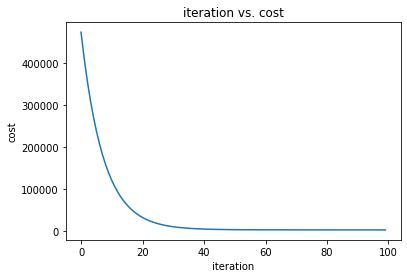

In [141]:
plt.plot(np.arange(0, 100), c_hist[:100])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("iteration vs. cost")

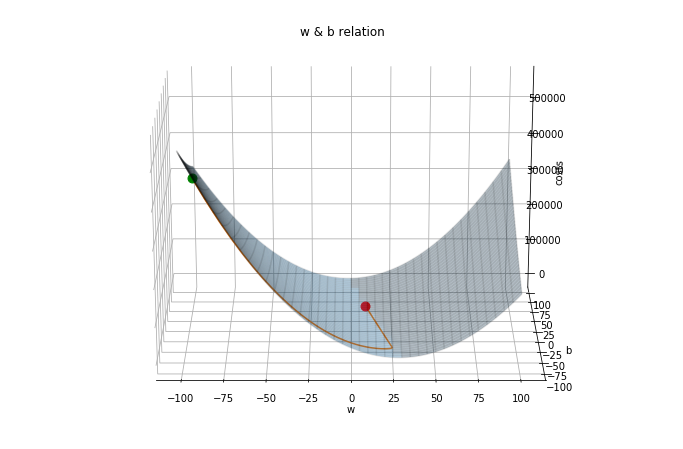

In [142]:
plt.figure(figsize=(12,8))

ax = plt.axes(projection = '3d')
ax.view_init(20, -90) # up-down / left-right

ax.xaxis.set_pane_color((0,0,0)) # write color 
ax.yaxis.set_pane_color((0,0,0)) # write color 
ax.zaxis.set_pane_color((0,0,0)) # write color 

b_grid, w_grid = np.meshgrid(bs, ws)

ax.plot_surface(w_grid, b_grid, costs, alpha = 0.3) # cmap="Spectral_r", 
ax.plot_wireframe(w_grid, b_grid, costs, color='k', alpha = 0.1)

ax.set_title("w & b relation")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")

w_index, b_index = np.where(costs == np.min(costs))

ax.scatter(ws[w_index], bs[b_index], costs[w_index,b_index], color="r", s=80)

## add the change paths of w & b
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="g", s=80)
plt.plot(w_hist, b_hist, c_hist)

plt.show()